## Trabajo simple con imágenes

Vamos a empezar leyendo y mostrando algunas imágenes, para entender cómo es su representación. Existen numerosos módulos que permiten manejar imágenes, desde el ubicuo `matplotlib`, pasando por `PIL` (`conda install pillow`) hasta openCV (`conda install opencv-python`). 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

El siguiente ejemplo es una figura tomada de algunas pruebas que hicimos en el laboratorio hace unos años. Es el resultado de la medición de flujo en toberas

La imagen "imag1" es del tipo: <class 'numpy.ndarray'> con "shape" (272, 652, 3)


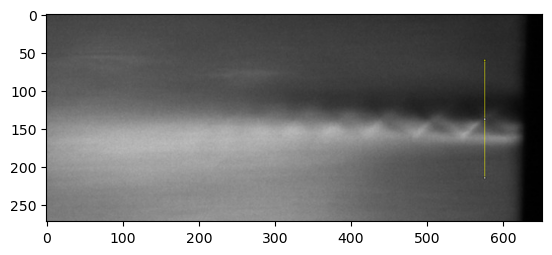

In [2]:
imag1 = plt.imread('figuras/imagen_flujo.jpg')
print(f'La imagen "imag1" es del tipo: {type(imag1)} con "shape" {imag1.shape}')
plt.imshow(imag1);

La representación de la imagen es una matriz, donde cada elemento corresponde a un pixel, y cada pixel tiene tres valores. El elemento `[0,0]` corresponde al pixel ubicado en la esquina superior izquierda, el elemento  `[-1,0]` al pixel ubicado en la esquina inferior izquierda, mientras que el  `[0,-1]` a la esquina superior derecha:

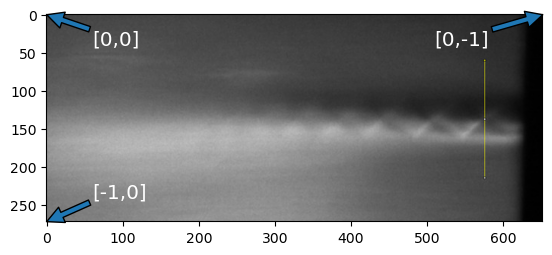

In [3]:
plt.imshow(imag1)
color='white'
plt.annotate("[0,0]",(0,0), (60,40), arrowprops={}, fontsize='x-large', color=color)
plt.annotate("[-1,0]",(0,272), (60,240), arrowprops={}, fontsize='x-large', color=color)
plt.annotate("[0,-1]",(652,0), (510,40), arrowprops={}, fontsize='x-large', color=color);

En consecuencia podemos ver qué valores toma cada pixel

In [4]:
print(imag1[0,0])             # El primer elemento
print(imag1[0,1])             # El segundo elemento
print(imag1.min(),imag1.max())  # y sus valores mínimo y máximo

[65 65 65]
[66 66 66]
0 255


Como vemos en cada pixel el valor está dado por un array de tres números enteros

In [5]:
imag1.dtype

dtype('uint8')

In [6]:
print(imag1[0,0])           # El primer elemento del primer pixel

[65 65 65]


Como originalmente teníamos una figura en escala de grises, podemos convertir los tres colores a una simple escala, por ejemplo promediando los tres valores. La función `imread()` puede interpretar la figura como una escala de grises con los argumentos adecuados:

In [7]:
Image.open('figuras/imagen_flujo.jpg').convert('L').save('figuras/imagen_flujo_gray.jpg')

In [8]:
imag2 = plt.imread('figuras/imagen_flujo_gray.jpg')

La variable `imag2` contiene ahora una matriz con las dimensiones de la imagen (272 x 652) pero con sólo un valor por cada pixel

In [9]:
print(imag2.shape)
print(imag2[0,0])

(272, 652)
65


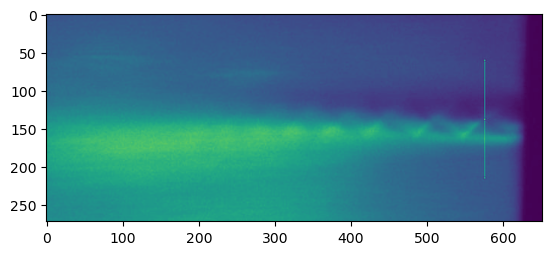

In [10]:
plt.imshow(imag2);

---

**Nota**
¿Qué pasó acá?

La función `imshow()` está interpretando el valor de cada pixel como una posición en una cierta escala de colores (**colormap**). Como no especificamos cuál queremos utilizar, se usó el cmap *default*. 

---


Especifiquemos el **colormap** a utilizar para la graficación:

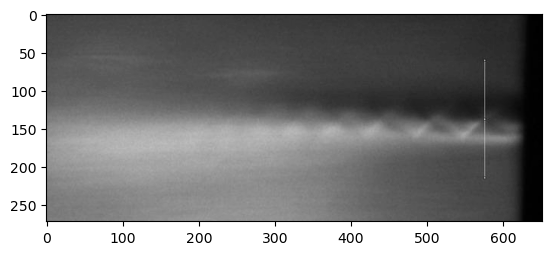

In [11]:
plt.imshow(imag2, cmap='gray');

Los `cmap` aparecen también en el contexto de graficación de gráficos de contorno (`contour()` y `contourf()`).

Al asociar un valor a un mapa de colores, la misma imagen puede mostrarse de diferente maneras. Veamos otros ejemplos de *colormap* 

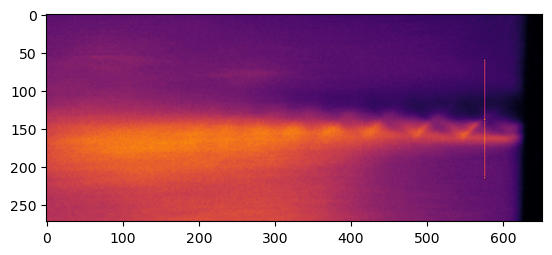

In [12]:
plt.imshow(imag2, cmap='inferno');

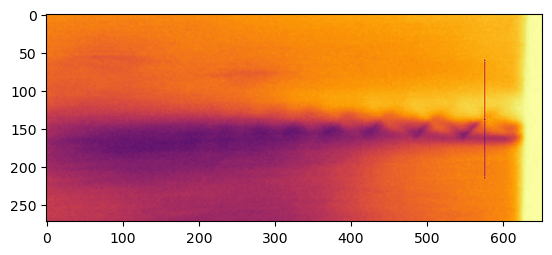

In [13]:
plt.imshow(imag2, cmap='inferno_r');

La referencia de ubicación de los `cmap` existentes está en:
http://matplotlib.org/examples/color/colormaps_reference.html

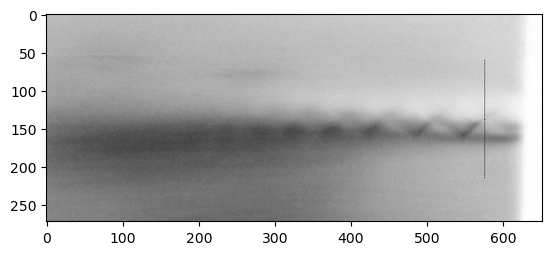

In [14]:
plt.imshow(imag2, cmap='gray_r');

### Análisis de la imagen

La imagen es una representación en mapa de colores de lo valores en la matriz. Esta es una representación que da muy buena información cualitativa sobre las características de los datos. Para analizar los datos a veces es más fácil hacer cortes o promediar en alguna dirección los datos.


#### Histograma de intensidades

Un ejemplo es el cálculo de un histograma de intensidades, analizando toda la imagen.

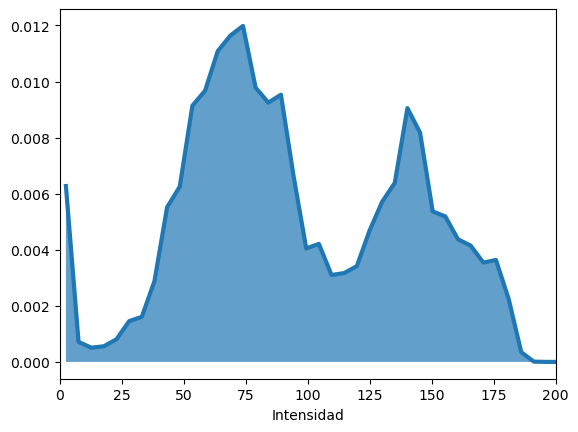

In [15]:
hist, bin_edges = np.histogram(imag2, bins=50, density=True)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
plt.fill_between(bin_centers, 0, hist, alpha=0.7)
plt.plot(bin_centers, hist, color='C0', lw=3)
plt.xlabel('Intensidad')
plt.xlim((0,200));

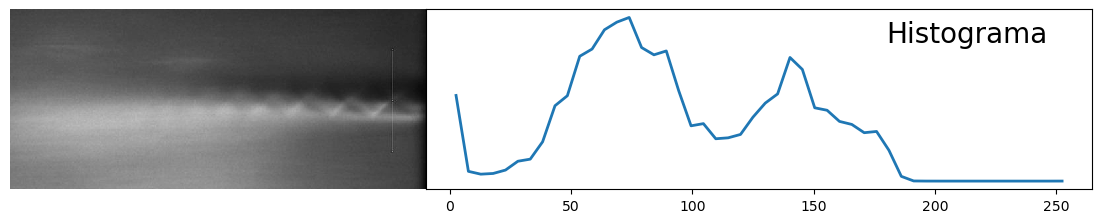

In [16]:
# Creamos una figura con los dos gráficos
fig, ax = plt.subplots(figsize=(10,2), ncols=2)
# En el gráfico de la izquierda mostramos la imagen en escala de grises
ax[0].imshow(imag2, cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')   # Eliminamos los dos ejes
#
# Graficamos a la derecha el histograma
ax[1].plot(bin_centers, hist, lw=2)
ax[1].text(180, 0.85*hist.max(), 'Histograma', fontsize=20)
ax[1].set_yticks([])   # Sólo valores en el eje x
plt.subplots_adjust(wspace=-0.20, top=1, bottom=0.1, left=-0.2, right=1)

Estos histogramas, son útiles pero no dan información sobre las variaciones de intensidad con la posición. De alguna manera estamos integrando demasiado. Cuando vemos la imagen, vemos un mapa de intensidad en dos dimensiones. Al hacer el histograma sobre toda la figura perdemos completamente la información sobre la posición.

#### Cortes en una dirección

Un análisis intermedio podemos hacerlo haciendo cortes a lo largo de alguna línea y analizando la intensidad. Por ejemplo, podemos elegir una línea vertical en un punto $x_0$, y analizar como varía la intensidad a lo largo de esa línea:

In [17]:
x0 = int(imag2.shape[1]*7/9)      # Elegimos un punto en el eje x
print(f'posición en eje x={x0} de un total de {imag2.shape[1]}')

posición en eje x=507 de un total de 652


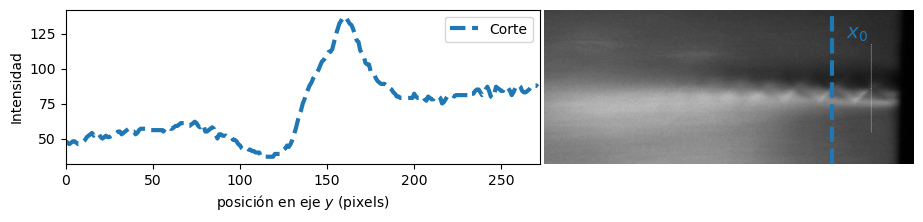

In [18]:
# Creamos la figura con dos subplots
fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=(10,2))
# graficamos la imagen en el subplot de la derecha
ax1.imshow(imag2, cmap=plt.cm.gray)
# y agregamos la línea vertical en el punto elegido
ax1.axvline(x0, ls='--', lw=3)
ax1.text(1.05*x0, 50, '$x_{0}$', fontsize='x-large', color='C0')
ax1.axis('off')
#
# Creamos linea como un array 1D con los datos a lo largo de la línea deseada
# y la graficamos
linea = imag2[:,x0]
ax2.plot(linea,'--', lw=3, label='Corte')
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
ax2.legend(loc='best')
ax2.set_xlim((0,len(linea)))
# Ajustamos el margen izquierdo y la distancia entre los dos subplots  
plt.subplots_adjust(wspace=-0.1, left=0)

### Trabajando con metadatos de la imagen

En la sección anterior vimos cómo trabajar con la imagen propiamente dicha, que representa como un arreglo tridimensional de `numpy`. Además, es posible que la imagen contenga _metadatos_, esto es, información asociada a la imagen que puede ser de utilidad. 

In [19]:
type(imag2)

numpy.ndarray

In [20]:
img3 = Image.open('figuras/imagen_flujo.jpg')
type(img3)

PIL.JpegImagePlugin.JpegImageFile

In [21]:
metadata = img3.info
metadata

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 2, 'jfif_density': (86, 86)}

Una de las ventajas del formato _png_ es que soporta metadatos arbitrarios, con lo cual podemos usar un plugin del modulo `PIL` para escribirlos:

In [22]:
from PIL.PngImagePlugin import PngInfo

In [23]:
new_metadata = PngInfo()
new_metadata.add_text("Autor", "F. Ulano")
new_metadata.add_text("Descripción", "Imagen de flujo en toberas")
# Agregamos la vieja metadata
for k,v in metadata.items():
    new_metadata.add_itxt(k, str(v)) 
    # new_metadata.add_text(k, str(v))


In [24]:
# Guardamos la imagen con la nueva metadata
img3.save('figuras/imagen_flujo_meta.png', pnginfo=new_metadata)
# Leemos la nueva imagen
img4 = Image.open('figuras/imagen_flujo_meta.png')
# Mostramos la metadata
img4.info

{'Autor': 'F. Ulano',
 'Descripción': 'Imagen de flujo en toberas',
 'jfif': '257',
 'jfif_version': '(1, 1)',
 'jfif_unit': '2',
 'jfif_density': '(86, 86)'}

> Otros formatos de imágenes (jpeg, por ejemplo) no soportan la inclusión de metadata arbitraria. En cada caso será necesario recurrir a módulos específicos para cada tipo de imagen.

En el caso de usar `Image.open` de `PIL` para leer el archivo de la imagen, obtendremos la imagen propiamente dicha con

In [25]:
imagen = Image.open('figuras/imagen_flujo.jpg')  # Cambiar por la ruta de la imagen
imagen_array = np.array(imagen)
print(imagen_array.shape)  # Imprime las dimensiones de la imagen

(272, 652, 3)


-----

## Ejercicios 13 (d)

5. Modificar el ejemplo anterior para presentar en una figura tres gráficos, agregando a la izquierda un panel donde se muestre un corte horizontal. El corte debe estar en la mitad del gráfico ($y_{0}=136$). En la figura debe mostrar la posición del corte (similarmente a como se hizo con el corte en $x$) con una línea de otro color.
6. Dada una imagen en color (por ejemplo, `figuras/babbage.png`), escribe un programa que calcule y grafique los histogramas de los tres canales de color (rojo, verde y azul) en un único gráfico. Cada canal debe representarse con su color correspondiente.

-----